<a href="https://www.kaggle.com/code/brittanywingard/netflix-movie-and-tv-show-analysis?scriptVersionId=107714132" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

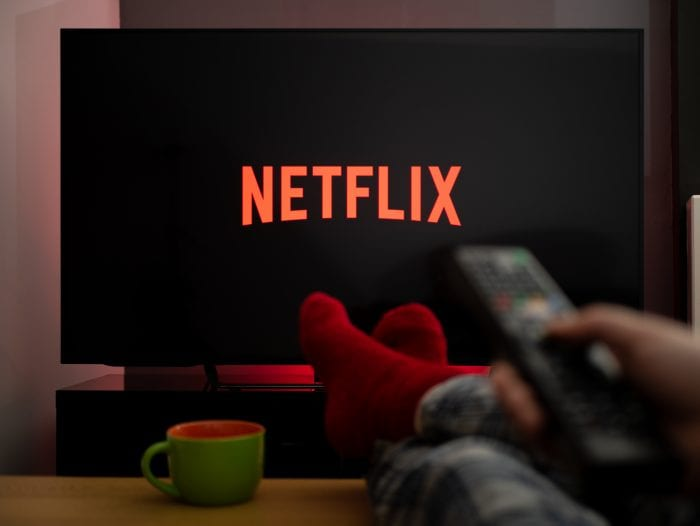

In [1]:
from IPython.display import Image
Image("../input/netflix-image/netflix-700x526.jpeg")

## Netflix Movie and TV Show Analysis

Brittany Wingard <br>
October 2022

Often times, I find myself scrolling, reading about, or watching trailers for hours before I actually decide to watch a movie or show on Netflix. The intention of this analysis is to better understand what's available on Netflix and ideally making a decision on what show to watch next! 

I'll be answering the following questions:
1. What country is producing most of the content?
2. What appears to be the most common genre available?
3. What are the top rated movies and tv shows?
4. Are there are any genres that appears to be higher rated than others?


For this analysis, I'll be using 3 datasets. One which contains a list of Netflix movies and tv shows while the other 2 are datasets coming from IMDB to get the ratings of the specific movies and tv shows.
1. Netflix Movie and TV Show Data: https://www.kaggle.com/datasets/shivamb/netflix-shows
1. IMDB Top 1000: https://www.kaggle.com/datasets/ramjasmaurya/top-250s-in-imdb

Let's get started!

In [2]:
# Numpy and Pandas libraries
import numpy as np
import pandas as pd

# Visualization libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/netflix-shows/netflix_titles.csv')
print(df.shape)

(8807, 12)


In [4]:
df.head(5)

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

At a quick glance at the data, **show_id** , **director**, **cast** , and **rating** do not seem as relevant to showcase in this analysis nor visualization. 

In [5]:
#dropping columns
df = df.drop(['show_id', 'director', 'cast', 'rating'], axis=1)

In [6]:
df.shape

(8807, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   country       7976 non-null   object
 3   date_added    8797 non-null   object
 4   release_year  8807 non-null   int64 
 5   duration      8804 non-null   object
 6   listed_in     8807 non-null   object
 7   description   8807 non-null   object
dtypes: int64(1), object(7)
memory usage: 550.6+ KB


In [8]:
df.isnull().sum()

type              0
title             0
country         831
date_added       10
release_year      0
duration          3
listed_in         0
description       0
dtype: int64

In [9]:
def percentage_nullValues(data):
    """
    Function that calculates the percentage of missing values in every column of your dataset
    input: data --> dataframe
    """
    null_perc = round(data.isnull().sum() / data.shape[0],3) * 100.00
    null_perc = pd.DataFrame(null_perc, columns=['Percentage_NaN'])
    null_perc= null_perc.sort_values(by = ['Percentage_NaN'], ascending = False)
    return null_perc

In [10]:
#Percentage of null values
missing = percentage_nullValues(df)
missing

Percentage_NaN
country                  9.4
date_added               0.1
type                     0.0
title                    0.0
release_year             0.0
duration                 0.0
listed_in                0.0
description              0.0

It appears that we have the most null values from from the following:

**country** &  **date_added**

---

Let's make a copy of this df and drop those values.

In [11]:
#making copy
df_copy = df.copy()

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

type            0
title           0
country         0
date_added      0
release_year    0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
#let's double check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7964 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7964 non-null   object
 1   title         7964 non-null   object
 2   country       7964 non-null   object
 3   date_added    7964 non-null   object
 4   release_year  7964 non-null   int64 
 5   duration      7964 non-null   object
 6   listed_in     7964 non-null   object
 7   description   7964 non-null   object
dtypes: int64(1), object(7)
memory usage: 560.0+ KB


Let's convert the variable **release_year** into a datetime variable type.

In [15]:
df["date_added"] = pd.to_datetime(df['date_added'])

In [16]:
df["date_added"].dtypes

dtype('<M8[ns]')

In [17]:
df['year_added'] = df['date_added'].dt.year
df.head(5)

type                          title  \
0    Movie           Dick Johnson Is Dead   
1  TV Show                  Blood & Water   
4  TV Show                   Kota Factory   
7    Movie                        Sankofa   
8  TV Show  The Great British Baking Show   

                                             country date_added  release_year  \
0                                      United States 2021-09-25          2020   
1                                       South Africa 2021-09-24          2021   
4                                              India 2021-09-24          2021   
7  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   
8                                     United Kingdom 2021-09-24          2021   

    duration                                          listed_in  \
0     90 min                                      Documentaries   
1  2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
4  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
7    125 min   Dramas, Independent Movies, International Movies   
8  9 Seasons                       British TV Shows, Reality TV   

                                         description  year_added  
0  As her father nears the end of his life, filmm...        2021  
1  After crossing paths at a party, a Cape Town t...        2021  
4  In a city of coaching centers known to train I...        2021  
7  On a photo shoot in Ghana, an American model s...        2021  
8  A talented batch of amateur bakers face off in...        2021

### How many Movies/TV Shows are represented throughout the dataset?

In [18]:
df['type'].value_counts()

Movie      5688
TV Show    2276
Name: type, dtype: int64

In [19]:
df_type = df['type'].value_counts().reset_index()
df_type.columns = ['Type', 'Total']

df_type

Type  Total
0    Movie   5688
1  TV Show   2276

In [20]:
df_type_fig = px.bar(df_type, x= 'Type', y="Total",
            title = 'Count of Movies vs. TV Show on Netflix', text = df_type['Total'],
             color_discrete_sequence = ['red'])

df_type_fig.show()

In [21]:
df_type_pc = df['type'].value_counts(normalize=True)*100
df_type_pc = df_type_pc.reset_index()
df_type_pc.columns =['Type', '%_Total']

df_type_pc


Type    %_Total
0    Movie  71.421396
1  TV Show  28.578604

In [22]:
df_type_pc_fig = px.pie(df_type_pc, values='%_Total',names='Type',title='Percentage of Movies vs TV Shows on Netflix') 
                 

df_type_pc_fig.show()

Oberserving the data, we have found that Netflix content contains about **71% movies** and **29% TV shows**.

## Which country do we see producing the most content?

In [23]:
country_data = df['country']
country_counting = country_data.value_counts()
country_counting

United States                             2809
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [24]:
#country_data.value_counts(normalize= True)*100

In [25]:
top20_country = country_counting.head(20)
#top20_country

In [26]:
top20_country = top20_country.reset_index()
#top20_country
top20_country.columns = ['country', 'count']
top20_country

country  count
0                   United States   2809
1                           India    972
2                  United Kingdom    418
3                           Japan    244
4                     South Korea    199
5                          Canada    181
6                           Spain    145
7                          France    124
8                          Mexico    110
9                           Egypt    106
10                         Turkey    105
11                        Nigeria     95
12                      Australia     86
13                         Taiwan     81
14                      Indonesia     79
15                         Brazil     77
16                    Philippines     75
17  United Kingdom, United States     75
18          United States, Canada     73
19                        Germany     67

In [27]:
# Bar plot
fig_bar = px.bar(top20_country, y = 'count', 
                 x= 'country', color= 'country')
fig_bar.update_layout(title= 'Distribution of thetop 20 producing countries on Netflix')
fig_bar.show()

In [28]:
#pie chart
fig_pie = px.pie(top20_country, values='count',names='country',title='Distribution of the top 20 producing countries on Netflix') 
fig_pie

It appears that the country with most content produced is the United States, followed by India, the UK, Japan, and South Korea. **However**, it appears that there is a lot of content in which multiple countries have collaborated on a film or series. Let's break up this string for a more accurate count. 

In [29]:
#lets take a look at the bottom 20 country just for comparision
#country_counting.tail(20)

In [30]:
#observing the unique values in country column
df['country'].unique()

array(['United States', 'South Africa', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom,

In [31]:
#splitting the text from the comma
", ".join(df['country']).split(", ")

['United States',
 'South Africa',
 'India',
 'United States',
 'Ghana',
 'Burkina Faso',
 'United Kingdom',
 'Germany',
 'Ethiopia',
 'United Kingdom',
 'United States',
 'Germany',
 'Czech Republic',
 'United States',
 'Mexico',
 'Turkey',
 'India',
 'Australia',
 'United States',
 'United States',
 'United States',
 'India',
 'France',
 'United Kingdom',
 'Finland',
 'China',
 'Canada',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'South Africa',
 'United States',
 'Japan',
 'United States',
 'Nigeria',
 'India',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'United States',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'United Kingdom',
 'India',
 'United States',
 'India',
 'United Kingdom',
 'Nigeria',
 'Japan',
 'United States',
 'United States',
 'Nigeria',
 'Spain',
 'United States',
 'France',
 'Belgium',
 'United Kingdom',
 'United States',
 'United States',
 'United Kingd

In [32]:
#creating new variable to store data
country_list = ", ".join(df['country']).split(", ")
country_list


['United States',
 'South Africa',
 'India',
 'United States',
 'Ghana',
 'Burkina Faso',
 'United Kingdom',
 'Germany',
 'Ethiopia',
 'United Kingdom',
 'United States',
 'Germany',
 'Czech Republic',
 'United States',
 'Mexico',
 'Turkey',
 'India',
 'Australia',
 'United States',
 'United States',
 'United States',
 'India',
 'France',
 'United Kingdom',
 'Finland',
 'China',
 'Canada',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'South Africa',
 'United States',
 'Japan',
 'United States',
 'Nigeria',
 'India',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'United States',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'United Kingdom',
 'India',
 'United States',
 'India',
 'United Kingdom',
 'Nigeria',
 'Japan',
 'United States',
 'United States',
 'Nigeria',
 'Spain',
 'United States',
 'France',
 'Belgium',
 'United Kingdom',
 'United States',
 'United States',
 'United Kingd

In [33]:
country_list = pd.DataFrame(country_list, columns= ['country'])
country_list

country
0      United States
1       South Africa
2              India
3      United States
4              Ghana
...              ...
9997          Jordan
9998   United States
9999   United States
10000  United States
10001          India

[10002 rows x 1 columns]

In [34]:
country_count = country_list.value_counts().reset_index()
country_count.columns= ['country', 'count']
country_count

country  count
0     United States   3680
1             India   1046
2    United Kingdom    803
3            Canada    445
4            France    393
..              ...    ...
122      Kazakhstan      1
123         Jamaica      1
124        Slovakia      1
125         Somalia      1
126       Lithuania      1

[127 rows x 2 columns]

In [35]:
# Bar plot
fig_bar = px.bar(country_count.head(20), x = 'count', y= 'country', color = 'country',
                 orientation='h')
fig_bar.update_layout(title= 'Distribution of countries')

fig_bar.show()

From restructing the data, we can see **Canada** and **France** emerging in the top 5 countries producing content available on Netflix. We can still observe that by far, the United States holds highest representation. 

The below chart further emphasizes the representation the United States has on Netflix along with the duration. 

In [36]:
fig = px.treemap(df, path=['country', 'year_added'], title = 'Country Representation of Netflix Content over time')
fig.show()

## How much content has been created over years?

In [37]:
movies = df[df["type"] == "Movie"]
movies.head(5)

type                 title  \
0   Movie  Dick Johnson Is Dead   
7   Movie               Sankofa   
9   Movie          The Starling   
12  Movie          Je Suis Karl   
24  Movie                 Jeans   

                                              country date_added  \
0                                       United States 2021-09-25   
7   United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
9                                       United States 2021-09-24   
12                            Germany, Czech Republic 2021-09-23   
24                                              India 2021-09-21   

    release_year duration                                         listed_in  \
0           2020   90 min                                     Documentaries   
7           1993  125 min  Dramas, Independent Movies, International Movies   
9           2021  104 min                                  Comedies, Dramas   
12          2021  127 min                      Dramas, International Movies   
24          1998  166 min   Comedies, International Movies, Romantic Movies   

                                          description  year_added  
0   As her father nears the end of his life, filmm...        2021  
7   On a photo shoot in Ghana, an American model s...        2021  
9   A woman adjusting to life after a loss contend...        2021  
12  After most of her family is murdered in a terr...        2021  
24  When the father of the man she loves insists t...        2021

In [38]:
movies_yr = movies['year_added'].value_counts().reset_index()
movies_yr.head(2)

index  year_added
0   2019        1349
1   2020        1223

In [39]:
movies_yr.columns = ['year_added', 'count']

In [40]:
movies_yr = movies_yr.sort_values(by= 'year_added')
movies_yr

year_added  count
12        2008      1
11        2009      2
13        2010      1
8         2011     13
10        2012      3
9         2013      6
7         2014     19
6         2015     54
5         2016    242
3         2017    813
2         2018   1192
0         2019   1349
1         2020   1223
4         2021    770

In [41]:
fig = px.scatter(movies_yr, x='year_added', y='count')
fig.update_traces(mode="markers+lines")
fig.update_layout(title="Movies content added over time")
fig.show()

In [42]:
tv = df[df["type"] == "TV Show"]
tv.head(5)

type                          title         country date_added  \
1   TV Show                  Blood & Water    South Africa 2021-09-24   
4   TV Show                   Kota Factory           India 2021-09-24   
8   TV Show  The Great British Baking Show  United Kingdom 2021-09-24   
15  TV Show              Dear White People   United States 2021-09-22   
17  TV Show                Falsa identidad          Mexico 2021-09-22   

    release_year   duration  \
1           2021  2 Seasons   
4           2021  2 Seasons   
8           2021  9 Seasons   
15          2021  4 Seasons   
17          2020  2 Seasons   

                                            listed_in  \
1     International TV Shows, TV Dramas, TV Mysteries   
4   International TV Shows, Romantic TV Shows, TV ...   
8                        British TV Shows, Reality TV   
15                             TV Comedies, TV Dramas   
17  Crime TV Shows, Spanish-Language TV Shows, TV ...   

                                          description  year_added  
1   After crossing paths at a party, a Cape Town t...        2021  
4   In a city of coaching centers known to train I...        2021  
8   A talented batch of amateur bakers face off in...        2021  
15  Students of color navigate the daily slights a...        2021  
17  Strangers Diego and Isabel flee their home in ...        2021

In [43]:
tv_yr = tv['year_added'].value_counts().reset_index()
tv_yr.columns = ['year_added', 'count']
tv_yr = tv_yr.sort_values(by= 'year_added')
tv_yr


year_added  count
9        2008      1
8        2013      5
7        2014      5
6        2015     25
5        2016    166
4        2017    309
3        2018    338
1        2019    509
0        2020    548
2        2021    370

In [44]:
fig = px.scatter(tv_yr, x='year_added', y='count')
fig.update_traces(mode="markers+lines")
fig.update_layout(title="TV Show content added over time")
fig.show()

In both movie and tv show content added on Netflix, we can see a growth starting in 2015 along with a drop in 2020 due to the onset of COVID-19. 

## What is the genre most represented?

In [45]:
df['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Dramas, International Movies', 'TV Comedies, TV Dramas',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies, Romantic Movies',
       'Docuseries, International TV Shows, Reality TV', 'Comedies',
       'Horror Movies, Sci-Fi & Fantasy', 'Thrillers',
       'British TV Shows, International TV Shows, TV Comedies',
       "Kids' TV, TV Comedies", 'Action & Adventure, Dramas', "Kids' TV",
       "Kids' TV, TV Sci-Fi & Fantasy",
       'Action & Adventure, Classic Movies, Dramas',
       'Dramas, Horror Movies, Thrillers',
       'Action & Adventure, Horror Movies, Thrillers',
       'Action & Adventure', 'Dramas

In [46]:
df['listed_in'].value_counts()

Documentaries                                                       343
Dramas, International Movies                                        337
Stand-Up Comedy                                                     303
Comedies, Dramas, International Movies                              260
Dramas, Independent Movies, International Movies                    243
                                                                   ... 
British TV Shows, Docuseries, TV Comedies                             1
TV Comedies, TV Dramas, TV Mysteries                                  1
Crime TV Shows, TV Comedies, Teen TV Shows                            1
Children & Family Movies, Faith & Spirituality, Music & Musicals      1
Cult Movies, Dramas, Thrillers                                        1
Name: listed_in, Length: 497, dtype: int64

Again we can observe that tv shows and movies can have multiple genres associated to it.

In [47]:
#splitting the text
", ".join(df['listed_in']).split(", ")

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'International TV Shows',
 'Romantic TV Shows',
 'TV Comedies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Comedies',
 'Dramas',
 'Dramas',
 'International Movies',
 'TV Comedies',
 'TV Dramas',
 'Crime TV Shows',
 'Spanish-Language TV Shows',
 'TV Dramas',
 'International TV Shows',
 'TV Action & Adventure',
 'TV Dramas',
 'Comedies',
 'International Movies',
 'Romantic Movies',
 'Docuseries',
 'International TV Shows',
 'Reality TV',
 'Comedies',
 'Horror Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'British TV Shows',
 'International TV Shows',
 'TV Comedies',
 "Kids' TV",
 'TV Comedies',
 'Action & Adventure',
 'Dramas',
 "Kids' TV",
 "Kids' TV",
 'TV Sci-Fi & Fantasy',
 'Action & Adventure',
 'Classic Movies',
 'Dramas',
 'Dramas',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Horror Mov

In [48]:
df_listed = ", ".join(movies['listed_in']).split(", ")
df_listed

['Documentaries',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Comedies',
 'Dramas',
 'Dramas',
 'International Movies',
 'Comedies',
 'International Movies',
 'Romantic Movies',
 'Comedies',
 'Horror Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Action & Adventure',
 'Dramas',
 'Action & Adventure',
 'Classic Movies',
 'Dramas',
 'Dramas',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Dramas',
 'Thrillers',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'Inter

In [49]:
type(df_listed)

list

In [50]:
pd.DataFrame(df_listed)

0
0                 Documentaries
1                        Dramas
2            Independent Movies
3          International Movies
4                      Comedies
...                         ...
12324  Children & Family Movies
12325                  Comedies
12326                    Dramas
12327      International Movies
12328          Music & Musicals

[12329 rows x 1 columns]

In [51]:
df_listed = pd.DataFrame(df_listed, columns= ['genre'])
df_listed

genre
0                 Documentaries
1                        Dramas
2            Independent Movies
3          International Movies
4                      Comedies
...                         ...
12324  Children & Family Movies
12325                  Comedies
12326                    Dramas
12327      International Movies
12328          Music & Musicals

[12329 rows x 1 columns]

In [52]:
genre_counts_ = df_listed.value_counts().reset_index()
genre_counts_.columns= ['genre', 'count']

In [53]:
genre_counts_

genre  count
0       International Movies   2543
1                     Dramas   2317
2                   Comedies   1580
3         Action & Adventure    817
4              Documentaries    794
5         Independent Movies    745
6            Romantic Movies    588
7                  Thrillers    549
8   Children & Family Movies    535
9              Horror Movies    340
10          Music & Musicals    328
11           Stand-Up Comedy    311
12          Sci-Fi & Fantasy    242
13             Sports Movies    201
14            Classic Movies    115
15              LGBTQ Movies     97
16               Cult Movies     70
17      Faith & Spirituality     63
18            Anime Features     63
19                    Movies     31

In [54]:
# Bar plot
fig_bar = px.bar(genre_counts_, x = 'count', y= 'genre', color= 'genre',
                 orientation='h')
fig_bar.update_layout(title= 'Distribution of the most frequent genres across Netflix')

fig_bar.show()

In [55]:
# Bar plot
fig_bar = px.bar(genre_counts_.head(10), x = 'count', y= 'genre', color= 'genre', orientation='h')
fig_bar.update_layout(title= 'Distribution of the 10 most frequent genres across Netflix')

fig_bar.show()

Narrowing in on the top 10 genres available on netflix, we see that **International Movies** has the most presence. 

Let's take a closer look at the genres available in movies and tv shows. 

In [56]:
movies_genres= ", ".join(movies['listed_in']).split(", ")
movies_genres

['Documentaries',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Comedies',
 'Dramas',
 'Dramas',
 'International Movies',
 'Comedies',
 'International Movies',
 'Romantic Movies',
 'Comedies',
 'Horror Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Action & Adventure',
 'Dramas',
 'Action & Adventure',
 'Classic Movies',
 'Dramas',
 'Dramas',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Dramas',
 'Thrillers',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'International Movies',
 'Action & Adventure',
 'Anime Features',
 'Inter

In [57]:
movies_genres = pd.DataFrame(movies_genres, columns= ['genre'])
movies_genres

genre
0                 Documentaries
1                        Dramas
2            Independent Movies
3          International Movies
4                      Comedies
...                         ...
12324  Children & Family Movies
12325                  Comedies
12326                    Dramas
12327      International Movies
12328          Music & Musicals

[12329 rows x 1 columns]

In [58]:
movies_genres = movies_genres.value_counts().reset_index()
movies_genres.columns= ['genre', 'count']
movies_genres

genre  count
0       International Movies   2543
1                     Dramas   2317
2                   Comedies   1580
3         Action & Adventure    817
4              Documentaries    794
5         Independent Movies    745
6            Romantic Movies    588
7                  Thrillers    549
8   Children & Family Movies    535
9              Horror Movies    340
10          Music & Musicals    328
11           Stand-Up Comedy    311
12          Sci-Fi & Fantasy    242
13             Sports Movies    201
14            Classic Movies    115
15              LGBTQ Movies     97
16               Cult Movies     70
17      Faith & Spirituality     63
18            Anime Features     63
19                    Movies     31

In [59]:
# Bar plot
fig_bar = px.bar(movies_genres.head(10), x = 'count', y= 'genre', color= 'genre', orientation='h')
fig_bar.update_layout(title= 'Distribution of the 10 most frequent genres among MOVIES on Netfilx')
fig_bar.show()

Observing the Movies available on Netflix, we can see that **International Movies** is still the most frequent genre available. 

In [60]:
tv_genres= ", ".join(tv['listed_in']).split(", ")
tv_genres

['International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'International TV Shows',
 'Romantic TV Shows',
 'TV Comedies',
 'British TV Shows',
 'Reality TV',
 'TV Comedies',
 'TV Dramas',
 'Crime TV Shows',
 'Spanish-Language TV Shows',
 'TV Dramas',
 'International TV Shows',
 'TV Action & Adventure',
 'TV Dramas',
 'Docuseries',
 'International TV Shows',
 'Reality TV',
 'British TV Shows',
 'International TV Shows',
 'TV Comedies',
 "Kids' TV",
 'TV Comedies',
 "Kids' TV",
 "Kids' TV",
 'TV Sci-Fi & Fantasy',
 'International TV Shows',
 'TV Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Reality TV',
 "Kids' TV",
 'Docuseries',
 'International TV Shows',
 "Kids' TV",
 'TV Comedies',
 'International TV Shows',
 'TV Dramas',
 'British TV Shows',
 'Docuseries',
 'International TV Shows',
 'Anime Series',
 'International TV Shows',
 'Crime TV Shows',
 'TV Comedies',
 'TV Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Reality TV',
 "Kids

In [61]:
tv_genres = pd.DataFrame(tv_genres, columns= ['genre'])
tv_genres

genre
0     International TV Shows
1                  TV Dramas
2               TV Mysteries
3     International TV Shows
4          Romantic TV Shows
...                      ...
5245               TV Dramas
5246                Kids' TV
5247  International TV Shows
5248       Romantic TV Shows
5249               TV Dramas

[5250 rows x 1 columns]

In [62]:
movies_genres = tv_genres.value_counts().reset_index()
movies_genres.columns= ['genre', 'count']
movies_genres

genre  count
0         International TV Shows   1127
1                      TV Dramas    662
2                    TV Comedies    494
3                 Crime TV Shows    420
4                       Kids' TV    369
5                     Docuseries    329
6              Romantic TV Shows    299
7               British TV Shows    236
8                     Reality TV    205
9                   Anime Series    153
10         TV Action & Adventure    152
11     Spanish-Language TV Shows    144
12               Korean TV Shows    136
13                  TV Mysteries     92
14           Science & Nature TV     82
15           TV Sci-Fi & Fantasy     78
16                     TV Horror     72
17                 Teen TV Shows     66
18                  TV Thrillers     53
19  Stand-Up Comedy & Talk Shows     47
20             Classic & Cult TV     25
21                      TV Shows      9

In [63]:
# Bar plot
fig_bar = px.bar(movies_genres.head(10), x = 'count', y= 'genre', color= 'genre', orientation='h')
fig_bar.update_layout(title= 'Distribution of the 10 most frequent genres among TV SHOWS on Netflix')
fig_bar.show()

Observing TV Shows, we see the most common genre being **International TV Shows**. 

While these are the most common genres observing **all** the content available of Netflix, let's check if this changes when focusing specifically on a country. For example, let's observe the genres within the United States. 

In [64]:
#lets observe the US now and see what genres they are producing the most. 

USA = df[df["country"] == "United States"]
USA.head(5)

type                 title        country date_added  release_year  \
0     Movie  Dick Johnson Is Dead  United States 2021-09-25          2020   
9     Movie          The Starling  United States 2021-09-24          2021   
15  TV Show     Dear White People  United States 2021-09-22          2021   
27    Movie             Grown Ups  United States 2021-09-20          2010   
28    Movie            Dark Skies  United States 2021-09-19          2013   

     duration                        listed_in  \
0      90 min                    Documentaries   
9     104 min                 Comedies, Dramas   
15  4 Seasons           TV Comedies, TV Dramas   
27    103 min                         Comedies   
28     97 min  Horror Movies, Sci-Fi & Fantasy   

                                          description  year_added  
0   As her father nears the end of his life, filmm...        2021  
9   A woman adjusting to life after a loss contend...        2021  
15  Students of color navigate the daily slights a...        2021  
27  Mourning the loss of their beloved junior high...        2021  
28  A family’s idyllic suburban life shatters when...        2021

In [65]:
USA_genre = ", ".join(USA['listed_in']).split(", ")
USA_genre

['Documentaries',
 'Comedies',
 'Dramas',
 'TV Comedies',
 'TV Dramas',
 'Comedies',
 'Horror Movies',
 'Sci-Fi & Fantasy',
 "Kids' TV",
 'TV Sci-Fi & Fantasy',
 'Action & Adventure',
 'Classic Movies',
 'Dramas',
 'Dramas',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Horror Movies',
 'Thrillers',
 'Action & Adventure',
 'Horror Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Reality TV',
 "Kids' TV",
 'TV Comedies',
 'Action & Adventure',
 'Crime TV Shows',
 'TV Comedies',
 'TV Dramas',
 'Documentaries',
 'Music & Musicals',
 "Kids' TV",
 'TV Comedies',
 'TV Sci-Fi & Fantasy',
 'Documentaries',
 'Sports Movies',
 "Kids' TV",
 'TV Comedies',
 'Children & Family Movies',
 'Dramas',
 'Crime TV Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'Action & Adventure',
 'Classic Movies',
 'Cult Movies',
 'Dramas',
 'Romantic Movies',
 'Classic Movies',
 'Comedies',
 'Dramas',
 'Action & Adventure',
 'Sci-Fi & Fantasy',
 'Comedies',
 'Cult Movies',
 'Comedies',
 'Cult Movies',


In [66]:
USA_genre = pd.DataFrame(USA_genre, columns= ['genre'])
#USA_genre

USA_genre_count = USA_genre.value_counts().reset_index()
USA_genre_count.columns= ['genre', 'count']

In [67]:
# Bar plot
fig_bar = px.bar(USA_genre_count.head(10), x = 'count', y= 'genre', color= 'genre', orientation='h')
fig_bar.update_layout(title= 'Distribution of the 10 most frequent genres in USA on Netflix')

fig_bar.show()

We can see here that the genre most present among the content within the United States is **Dramas**. Therefore we can conclude is that the genre produced is dependant on the the country. 

## What are the highest rated Movies and TV shows on Netflix?
In order to answer this, we'll need to join in another dataset that features IMDB ratings of that specific movie or TV Show. 

In [68]:
imdb_movies = pd.read_csv('../input/top-250s-in-imdb/imdb (1000 movies) in june 2022.csv')
print(imdb_movies.shape)

(1000, 16)


In [69]:
imdb_movies.head(5)

ranking of movie\r\n                                 movie name\r\n   Year  \
0                    1                       The Shawshank Redemption  -1994   
1                    2                                  The Godfather  -1972   
2                    3                                The Dark Knight  -2008   
3                    4  The Lord of the Rings: The Return of the King  -2003   
4                    5                               Schindler's List  -1993   

  certificate  runtime                      genre  RATING  metascore  \
0          15  142 min                      Drama     9.3       81.0   
1           X  175 min               Crime, Drama     9.2      100.0   
2         12A  152 min       Action, Crime, Drama     9.0       84.0   
3         12A  201 min   Action, Adventure, Drama     9.0       94.0   
4          15  195 min  Biography, Drama, History     9.0       94.0   

                                DETAIL ABOUT MOVIE\n          DIRECTOR\r\n  \
0  Two imprisoned men bond over a number of years...        Frank Darabont   
1  The aging patriarch of an organized crime dyna...  Francis Ford Coppola   
2  When the menace known as the Joker wreaks havo...     Christopher Nolan   
3  Gandalf and Aragorn lead the World of Men agai...         Peter Jackson   
4  In German-occupied Poland during World War II,...      Steven Spielberg   

        ACTOR 1\n        ACTOR 2\n        ACTOR 3           ACTOR 4  \
0     Tim Robbins   Morgan Freeman     Bob Gunton    William Sadler   
1   Marlon Brando        Al Pacino     James Caan      Diane Keaton   
2  Christian Bale     Heath Ledger  Aaron Eckhart     Michael Caine   
3     Elijah Wood  Viggo Mortensen   Ian McKellen     Orlando Bloom   
4     Liam Neeson    Ralph Fiennes   Ben Kingsley  Caroline Goodall   

       votes GROSS COLLECTION\r\n  
0  2,603,314              $28.34M  
1  1,798,731             $134.97M  
2  2,574,810             $534.86M  
3  1,787,701             $377.85M  
4  1,323,776              $96.90M

In [70]:
imdb_movies.rename(columns = {'movie name\r\n': 'title', 'RATING': 'ratings'}, inplace = True)

imdb_movies.columns

Index(['ranking of movie\r\n', 'title', 'Year', 'certificate', 'runtime',
       'genre', 'ratings', 'metascore', 'DETAIL ABOUT MOVIE\n', 'DIRECTOR\r\n',
       'ACTOR 1\n', 'ACTOR 2\n', 'ACTOR 3', 'ACTOR 4', 'votes',
       'GROSS COLLECTION\r\n'],
      dtype='object')

In [71]:
movies = pd.merge(movies,imdb_movies[['title', 'ratings']], on = 'title', how = 'left')
movies.head(5)

type                 title  \
0  Movie  Dick Johnson Is Dead   
1  Movie               Sankofa   
2  Movie          The Starling   
3  Movie          Je Suis Karl   
4  Movie                 Jeans   

                                             country date_added  release_year  \
0                                      United States 2021-09-25          2020   
1  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   
2                                      United States 2021-09-24          2021   
3                            Germany, Czech Republic 2021-09-23          2021   
4                                              India 2021-09-21          1998   

  duration                                         listed_in  \
0   90 min                                     Documentaries   
1  125 min  Dramas, Independent Movies, International Movies   
2  104 min                                  Comedies, Dramas   
3  127 min                      Dramas, International Movies   
4  166 min   Comedies, International Movies, Romantic Movies   

                                         description  year_added  ratings  
0  As her father nears the end of his life, filmm...        2021      NaN  
1  On a photo shoot in Ghana, an American model s...        2021      NaN  
2  A woman adjusting to life after a loss contend...        2021      NaN  
3  After most of her family is murdered in a terr...        2021      NaN  
4  When the father of the man she loves insists t...        2021      NaN

Looks like there are a lot of nulls. This is becuase the dataset that was joined only shows the top 1000 movies ratings and not all that are within our Netflix dataset. 

In [72]:
movies.isnull().sum()

type               0
title              0
country            0
date_added         0
release_year       0
duration           0
listed_in          0
description        0
year_added         0
ratings         5523
dtype: int64

In [73]:
#lets observe only those movies identified found in the merge

top_movies = movies[movies.ratings.notnull()]
top_movies.shape

(167, 10)

In [74]:
#top 10
top10_movies = top_movies.pivot_table(index = 'title',
                               values = 'ratings').sort_values(by = 'ratings', ascending = False).head(10)
top10_movies = top10_movies.reset_index()
top10_movies

title  ratings
0  The Lord of the Rings: The Return of the King      9.0
1                               Schindler's List      9.0
2                                   Pulp Fiction      8.9
3                                      Inception      8.8
4          The Lord of the Rings: The Two Towers      8.8
5                                     The Matrix      8.7
6                                    City of God      8.6
7                             American History X      8.5
8                                    The Pianist      8.5
9                                   The Departed      8.5

In [75]:
movie_fig = px.bar(top10_movies, x= 'title', y="ratings", text=top10_movies['ratings'],title = 'Top 10 Movies by Ratings on Netflix')
movie_fig.show()

From the above graph, we can see that **Lord of the Rings:The Return of the King** and **Schindler's List** are the top rated movies available on Netflix according to the top ratings on IMDB as both are rated 9.0

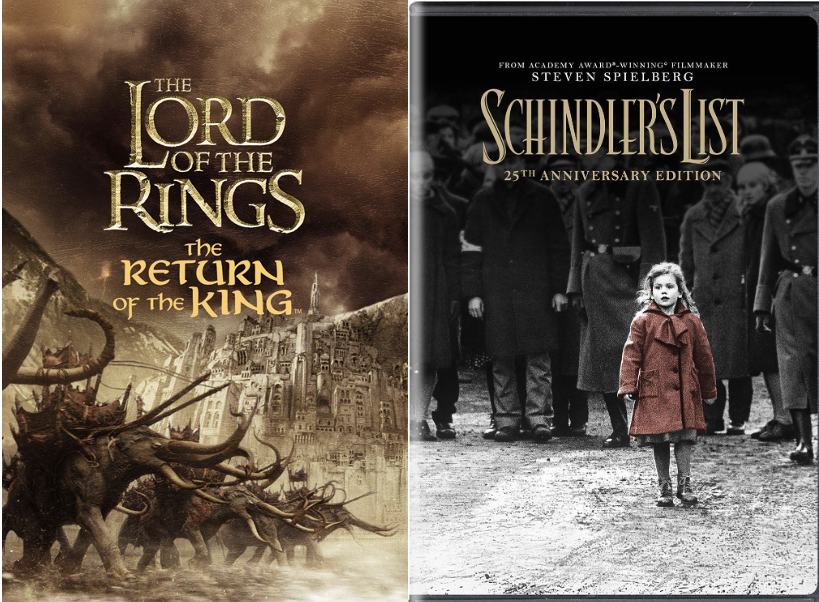

In [76]:
from IPython.display import Image
Image("../input/lordofringsschind/movie_1.png")

**Let's take a look at TV Shows:**

In [77]:
#same process for tv shows

imdb_tv = pd.read_csv('../input/top-250s-in-imdb/imdb (1000 tv series) - (june 2022).csv')
print(imdb_tv.shape)

(1000, 13)


In [78]:
imdb_tv.head(5)

ranking series name\r         Year certificate runtime  \
0       1         Bluey     (2018– )           U   7 min   
1       2  Breaking Bad  (2008–2013)          15  49 min   
2       3    The Chosen     (2017– )         NaN  54 min   
3       4   BB Ki Vines     (2015– )   Not Rated     NaN   
4       5    The Heroes     (2008– )   Not Rated  30 min   

                       genre  rating  \
0          Animation, Family     9.7   
1     Crime, Drama, Thriller     9.5   
2             Drama, History     9.4   
3                     Comedy     9.4   
4  Animation, Drama, History     9.4   

                                             DETAILS              ACTOR 1  \
0  The slice-of-life adventures of an Australian ...      David McCormack   
1  A high school chemistry teacher diagnosed with...       Bryan Cranston   
2  A charismatic fisherman struggling with debt. ...     Elizabeth Tabish   
3  BB Ki Vines is a Video series. Bhuvan Bam is t...           Bhuvan Bam   
4  The moral stories of a group of champions (Pah...  Ali Hemmat Momivand   

             ACTOR 2               ACTOR 3         ACTOR 4      VOTES  
0    Melanie Zanetti          Brad Elliott       Dan Brumm      7,114  
1         Aaron Paul             Anna Gunn    Betsy Brandt  1,756,075  
2       Shahar Isaac       Jonathan Roumie     Paras Patel     26,090  
3       Amanda Cerny                   NaN             NaN      8,172  
4  Bijan Alimohamadi  Shahrooz Malek Arayi  Siamak Atlassi    164,850

In [79]:
imdb_tv.rename(columns = {'series name\r': 'title'}, inplace = True)

imdb_movies.columns

Index(['ranking of movie\r\n', 'title', 'Year', 'certificate', 'runtime',
       'genre', 'ratings', 'metascore', 'DETAIL ABOUT MOVIE\n', 'DIRECTOR\r\n',
       'ACTOR 1\n', 'ACTOR 2\n', 'ACTOR 3', 'ACTOR 4', 'votes',
       'GROSS COLLECTION\r\n'],
      dtype='object')

In [80]:
tv = pd.merge(tv,imdb_tv[['title', 'rating']], on = 'title', how = 'left')
tv.head(5)

type                          title         country date_added  \
0  TV Show                  Blood & Water    South Africa 2021-09-24   
1  TV Show                   Kota Factory           India 2021-09-24   
2  TV Show  The Great British Baking Show  United Kingdom 2021-09-24   
3  TV Show              Dear White People   United States 2021-09-22   
4  TV Show                Falsa identidad          Mexico 2021-09-22   

   release_year   duration                                          listed_in  \
0          2021  2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
1          2021  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
2          2021  9 Seasons                       British TV Shows, Reality TV   
3          2021  4 Seasons                             TV Comedies, TV Dramas   
4          2020  2 Seasons  Crime TV Shows, Spanish-Language TV Shows, TV ...   

                                         description  year_added  rating  
0  After crossing paths at a party, a Cape Town t...        2021     NaN  
1  In a city of coaching centers known to train I...        2021     9.1  
2  A talented batch of amateur bakers face off in...        2021     NaN  
3  Students of color navigate the daily slights a...        2021     NaN  
4  Strangers Diego and Isabel flee their home in ...        2021     NaN

In [81]:
tv.isnull().sum()

type               0
title              0
country            0
date_added         0
release_year       0
duration           0
listed_in          0
description        0
year_added         0
rating          2148
dtype: int64

In [82]:
#lets observe only those tv shows identified found in the merge

top_tv = tv[tv.rating.notnull()]
top_tv.shape

(130, 10)

In [83]:
top10_tv = top_tv.pivot_table(index = 'title',
                               values = 'rating').sort_values(by = 'rating', ascending = False).head(10)

top10_tv = top10_tv.reset_index()
top10_tv

title  rating
0                                Breaking Bad     9.5
1                  Avatar: The Last Airbender     9.3
2                                  Reply 1988     9.2
3            Fullmetal Alchemist: Brotherhood     9.1
4                                   My Mister     9.1
5                                Kota Factory     9.1
6                                    Sherlock     9.1
7                                     Ramayan     9.0
8  Leah Remini: Scientology and the Aftermath     9.0
9                             Yeh Meri Family     9.0

In [84]:
tv_fig = px.bar(top10_tv, x= 'title', y="rating", text=top10_tv['rating'], title = 'Top rated 10 TV Shows on Netflix')
tv_fig.show()

From the above graph, we can see that *Breaking Bad* is the top rated TV Show available on Netflix according to the top ratings on IMDB at 9.5. 

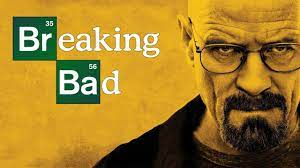

In [85]:
from IPython.display import Image
Image("../input/breakingbad/breakingbad.jpeg")

In [86]:
imdb_tv.pivot_table(index = 'title',
                               values = 'rating').sort_values(by = 'rating', ascending = False).head(10)

rating
title                             
Bluey                          9.7
Breaking Bad                   9.5
The Chosen                     9.4
BB Ki Vines                    9.4
The Heroes                     9.4
The Joy of Painting            9.3
Avatar: The Last Airbender     9.3
B.E. Rojgaar                   9.3
The Wire                       9.3
Farouk Omar                    9.3

## What is the most common genre identifed within the top rated movies & TV shows?
Now, looking at the data from the top 1000 rated movies and TV shows with IMDB, can we notice what genre has a higher presence?

Let's start first with movies. 

In [87]:
imdb_movies.head(5)

ranking of movie\r\n                                          title   Year  \
0                    1                       The Shawshank Redemption  -1994   
1                    2                                  The Godfather  -1972   
2                    3                                The Dark Knight  -2008   
3                    4  The Lord of the Rings: The Return of the King  -2003   
4                    5                               Schindler's List  -1993   

  certificate  runtime                      genre  ratings  metascore  \
0          15  142 min                      Drama      9.3       81.0   
1           X  175 min               Crime, Drama      9.2      100.0   
2         12A  152 min       Action, Crime, Drama      9.0       84.0   
3         12A  201 min   Action, Adventure, Drama      9.0       94.0   
4          15  195 min  Biography, Drama, History      9.0       94.0   

                                DETAIL ABOUT MOVIE\n          DIRECTOR\r\n  \
0  Two imprisoned men bond over a number of years...        Frank Darabont   
1  The aging patriarch of an organized crime dyna...  Francis Ford Coppola   
2  When the menace known as the Joker wreaks havo...     Christopher Nolan   
3  Gandalf and Aragorn lead the World of Men agai...         Peter Jackson   
4  In German-occupied Poland during World War II,...      Steven Spielberg   

        ACTOR 1\n        ACTOR 2\n        ACTOR 3           ACTOR 4  \
0     Tim Robbins   Morgan Freeman     Bob Gunton    William Sadler   
1   Marlon Brando        Al Pacino     James Caan      Diane Keaton   
2  Christian Bale     Heath Ledger  Aaron Eckhart     Michael Caine   
3     Elijah Wood  Viggo Mortensen   Ian McKellen     Orlando Bloom   
4     Liam Neeson    Ralph Fiennes   Ben Kingsley  Caroline Goodall   

       votes GROSS COLLECTION\r\n  
0  2,603,314              $28.34M  
1  1,798,731             $134.97M  
2  2,574,810             $534.86M  
3  1,787,701             $377.85M  
4  1,323,776              $96.90M

In [88]:
#grouping genre
imdb_genre = imdb_movies[['genre', 'ratings']].groupby('genre').mean().sort_values(by = 'ratings', ascending = False)
imdb_genre = imdb_genre.reset_index()
imdb_genre

genre  ratings
0          Adventure, Western      8.8
1      Drama, Family, Fantasy      8.6
2       Crime, Drama, Fantasy      8.6
3       Animation, Drama, War      8.5
4         Drama, Mystery, War      8.5
..                        ...      ...
197     Action, Crime, Sci-Fi      7.6
198  Action, Adventure, Crime      7.6
199  Fantasy, Mystery, Sci-Fi      7.6
200    Drama, Horror, Mystery      7.6
201    Action, Comedy, Horror      7.6

[202 rows x 2 columns]

In [89]:
imdb_genre_fig = px.bar(imdb_genre.head(10), x= 'genre', y="ratings",
                        title = 'Top 10 highest rated movie genres on IMDB')
imdb_genre_fig.show()

When grouping the genre and taking the average rating, tt appears that those movies falling under **Adventure, Western** have had the highest average rating on IMDB. 

Similar to our Netflix dataset, there are movies that have multiple genres associated. Let's seperate each genre and collect the count of each to see what is the highest representation.

In [90]:
imdb_movies_genre = ", ".join(imdb_movies['genre']).split(", ")
imdb_movies_genre

['Drama',
 'Crime',
 'Drama',
 'Action',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Biography',
 'Drama',
 'History',
 'Crime',
 'Drama',
 'Crime',
 'Drama',
 'Crime',
 'Drama',
 'Mystery',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Drama',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Western',
 'Drama',
 'Action',
 'Sci-Fi',
 'Biography',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Fantasy',
 'Drama',
 'Action',
 'Drama',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Animation',
 'Adventure',
 'Family',
 'Drama',
 'War',
 'Crime',
 'Drama',
 'Fantasy',
 'Comedy',
 'Drama',
 'Romance',
 'Crime',
 'Drama',
 'Mystery',
 'Action',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Drama',
 'Mystery',
 'Action',
 'Drama',
 'Drama',
 'Family',
 'Fantasy',
 'Action',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Drama',
 'Music',
 'Biography',
 

In [91]:
imdb_movies_genre = pd.DataFrame(imdb_movies_genre, columns= ['genre'])
imdb_movies_genre

genre
0        Drama
1        Crime
2        Drama
3       Action
4        Crime
...        ...
2533     Crime
2534   Mystery
2535  Thriller
2536    Horror
2537    Sci-Fi

[2538 rows x 1 columns]

In [92]:
imdb_movies_genre = imdb_movies_genre.value_counts().reset_index()
imdb_movies_genre.columns= ['genre', 'count']

In [93]:
# Bar plot
fig_bar = px.bar(imdb_movies_genre, x = 'count', y= 'genre', color= 'genre',
                 orientation='h')
fig_bar.update_layout(title= 'Genres of top ranked movies according to IMDB')
fig_bar.show()

According to our findings, the genre **Drama** is found most representaive within the top 1000 dataset.

Let's take a look at tv shows as well.

In [94]:
imdb_tv.head(5)

ranking         title         Year certificate runtime  \
0       1         Bluey     (2018– )           U   7 min   
1       2  Breaking Bad  (2008–2013)          15  49 min   
2       3    The Chosen     (2017– )         NaN  54 min   
3       4   BB Ki Vines     (2015– )   Not Rated     NaN   
4       5    The Heroes     (2008– )   Not Rated  30 min   

                       genre  rating  \
0          Animation, Family     9.7   
1     Crime, Drama, Thriller     9.5   
2             Drama, History     9.4   
3                     Comedy     9.4   
4  Animation, Drama, History     9.4   

                                             DETAILS              ACTOR 1  \
0  The slice-of-life adventures of an Australian ...      David McCormack   
1  A high school chemistry teacher diagnosed with...       Bryan Cranston   
2  A charismatic fisherman struggling with debt. ...     Elizabeth Tabish   
3  BB Ki Vines is a Video series. Bhuvan Bam is t...           Bhuvan Bam   
4  The moral stories of a group of champions (Pah...  Ali Hemmat Momivand   

             ACTOR 2               ACTOR 3         ACTOR 4      VOTES  
0    Melanie Zanetti          Brad Elliott       Dan Brumm      7,114  
1         Aaron Paul             Anna Gunn    Betsy Brandt  1,756,075  
2       Shahar Isaac       Jonathan Roumie     Paras Patel     26,090  
3       Amanda Cerny                   NaN             NaN      8,172  
4  Bijan Alimohamadi  Shahrooz Malek Arayi  Siamak Atlassi    164,850

In [95]:
imdb_tv_genre = imdb_tv[['genre', 'rating']].groupby('genre').mean().sort_values(by = 'rating', ascending = False)
imdb_tv_genre = imdb_tv_genre.reset_index().head(10)
imdb_tv_genre

genre  rating
0        Animation, Drama, History    9.40
1              Documentary, Family    9.30
2        Documentary, History, War    9.20
3               Adventure, Fantasy    9.20
4                    Short, Comedy    9.20
5  Documentary, Comedy, Reality-TV    9.00
6    Documentary, History, Mystery    9.00
7         Adventure, Drama, Sci-Fi    9.00
8                        Animation    9.00
9                Animation, Family    8.95

In [96]:
imdb_tv_genre_fig = px.bar(imdb_tv_genre, x= 'genre', y="rating",
                        title = 'Top 10 highest rated TV Show genres on IMDB')
imdb_tv_genre_fig.show()


It appears that those grouped under ***Animation, Drama, History*** have the highest average rated genre. 

In [97]:
imdb_tv_genre_listed = ", ".join(imdb_tv['genre']).split(", ")
imdb_tv_genre_listed

['Animation',
 'Family',
 'Crime',
 'Drama',
 'Thriller',
 'Drama',
 'History',
 'Comedy',
 'Animation',
 'Drama',
 'History',
 'Biography',
 'Drama',
 'History',
 'Drama',
 'Drama',
 'Biography',
 'Crime',
 'Drama',
 'Animation',
 'Action',
 'Adventure',
 'Documentary',
 'Family',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Drama',
 'Family',
 'Adventure',
 'Fantasy',
 'Short',
 'Comedy',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Crime',
 'Drama',
 'Documentary',
 'History',
 'War',
 'Comedy',
 'Drama',
 'Drama',
 'Family',
 'Comedy',
 'Drama',
 'Documentary',
 'Sport',
 'Adventure',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Mystery',
 'Animation',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Family',
 'Drama',
 'Fantasy',
 'Horror',
 'Comedy',
 'Drama',
 'Family',
 'Crime',
 'Drama',
 'Thriller',
 'Documentary',
 'History',
 'Mystery',
 'Comedy',
 'Game-Show',
 'Animation',
 'Action',
 'Adventure',
 'Anima

In [98]:
imdb_tv_genre_listed = pd.DataFrame(imdb_tv_genre_listed, columns= ['genre'])
imdb_tv_genre_listed

genre
0     Animation
1        Family
2         Crime
3         Drama
4      Thriller
...         ...
2438     Comedy
2439      Drama
2440  Animation
2441     Action
2442  Adventure

[2443 rows x 1 columns]

In [99]:
imdb_tv_genre_listed = imdb_tv_genre_listed.value_counts().reset_index()
imdb_tv_genre_listed.columns= ['genre', 'count']

In [100]:
# Bar plot
fig_bar = px.bar(imdb_tv_genre_listed, x = 'count', y= 'genre', color= 'genre',
                 orientation='h')
fig_bar.update_layout(title= 'Genres of top ranked TV Shows according to IMDB')

fig_bar.show()

Similar to movies, it appears that the genre under **Drama** falls at the top represented genre represented. 

## Conclusions & Recommendations

**Conclusions**

1. When looking at content available on Netflix, there is a lot more movies available compared to TV Shows. From the data, we learned that while 29% of content represents TV Shows, **71% represents movies**. 
1. The **United States** is the top country observing the amount of content available. 
1. The top movie genre on Netfilx is **International Movies** & the top TV Show genre is **International TV Shows**. This will however varies across countries. When we focused in on the United States ,we saw that *Dramas* were the most frequency occurring genre. 
1. We discovered that **Lord of the Rings:The Return of the King** and **Schindler's List** are the top rated movies available on Netflix according to the top ratings on IMDB as both are rated 9.0.
1. The top TV show on Netflix is **Breaking Bad** rated with a 9.5.
1. Focusing on the top 1000 ranked Movie and TV Shows from our IMDB dataset, we can observe that **Dramas** is the most frequent occurring genre. 

**Recommendations**

When comparing what is available on Netflix compared to the top 10 rated movies on IMDB, the following is recommended to be added to Netfilx:
1. Shawshank Redemption
1. The Godfather
1. 12 Angry Men
1. The Godfather II
1. The Dark Knight
1. Jai Bhim

In [101]:
#movies available on Netfilx
#top10_movies

In [102]:
#Top rated movies on IMBB
#imdb_movies.pivot_table(index = 'title',
                               #values = 'ratings').sort_values(by = 'ratings', ascending = False).head(10)

Observing the top 10 rated movies on IMDB, the following is recommended to be added to Netfilx

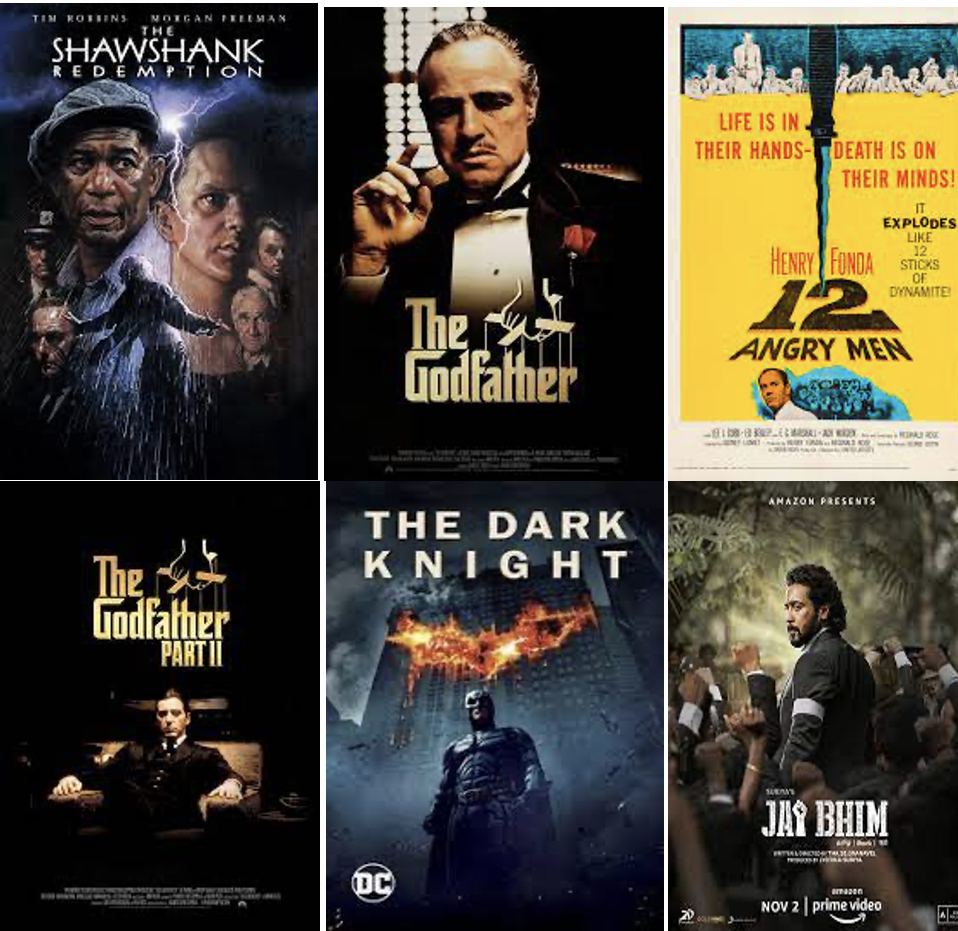

In [103]:
from IPython.display import Image
Image("../input/movierec/movie_rec.png")

Observing the top 10 rated TV Shows on IMDB, the following is recommended to be added to Netfilx:
1. Bluey
1. The Chosen
1. BB Ki Vines
1. The Heroes
1. The Joy of Painting	
1. B.E. Rojgaar
1. The Wire
1. Farouk Omar

In [104]:
#top10_tv

In [105]:
#imdb_tv.pivot_table(index = 'title',
                               #values = 'rating').sort_values(by = 'rating', ascending = False).head(10)

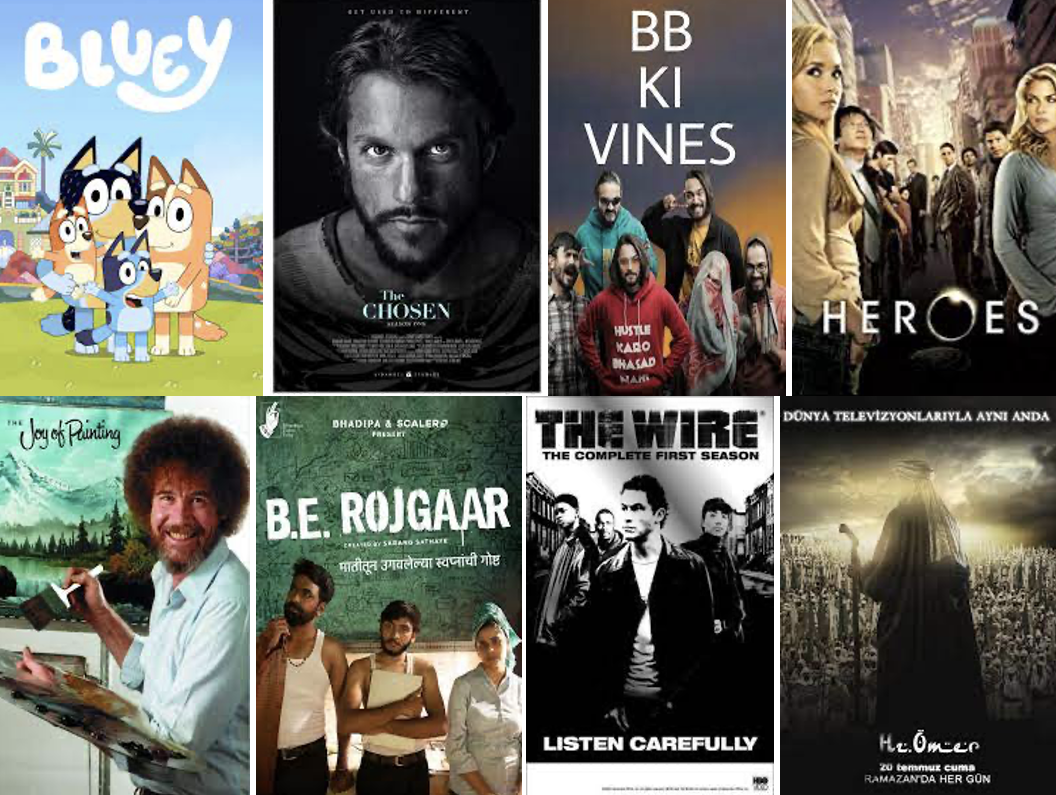

In [106]:
from IPython.display import Image
Image("../input/tvrecc/tv_rec.png")